In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap, LogNorm


In [2]:
data = pd.read_csv('experiments/experiment 6.3.csv', skiprows=6)
data.head(5)

,[run number],avg-num-groups-per-agent,sd-num-groups-per-agent,group-strength-increase,gamma0,gamma1,num-agents,base-death-rate,bubble-size,max-ticks,...,opinion-extremity-increase,alpha2,max-age,multiple-group-membership?,offline-interaction-interval,birth-rate,interaction-radius,age-death-factor,[step],[opinion] of turtles
0,3,2,1,0.05,1.5,-0.5,350,0.0002,25,50000,...,0.01,0.3,100,True,50,0.140708,1,0.02,0,[0.75361973824917 0.8912298368909745 0.7992622...
1,4,2,1,0.05,1.5,-0.5,350,0.0002,25,50000,...,0.01,0.3,100,True,50,0.140708,1,0.02,0,[0.10071979571809253 0.9498817539708989 0.6704...
2,5,2,1,0.05,1.5,-0.5,350,0.0002,25,50000,...,0.01,0.3,100,True,50,0.140708,1,0.02,0,[0.5172478542043308 0.42712125887640473 0.4476...
3,1,2,1,0.05,1.5,-0.5,350,0.0002,25,50000,...,0.01,0.3,100,True,50,0.140708,1,0.02,0,[0.3724854929140201 0.03310669930180632 0.7909...
4,5,2,1,0.05,1.5,-0.5,350,0.0002,25,50000,...,0.01,0.3,100,True,50,0.140708,1,0.02,1,[0.4547299717757922 0.017482152076467777 0.743...


In [3]:
run_1_data = data[data['[run number]'] == 1]
 
steps = []
opinions = []
for _, row in run_1_data.iterrows():
    step = row['[step]']
    current_opinions = list(map(float, row['[opinion] of turtles'].strip('[]').split()))
    steps.extend([step] * len(current_opinions))
    opinions.extend(current_opinions)

In [4]:
colours = [(1, 1, 1, 0), (0.75, 0.75, 0.75, 1), (0, 0, 0, 1)]  # Adding alpha transparency to white
cmap_name = 'custom_cmap'
cmap = LinearSegmentedColormap.from_list(cmap_name, colours, N=100)

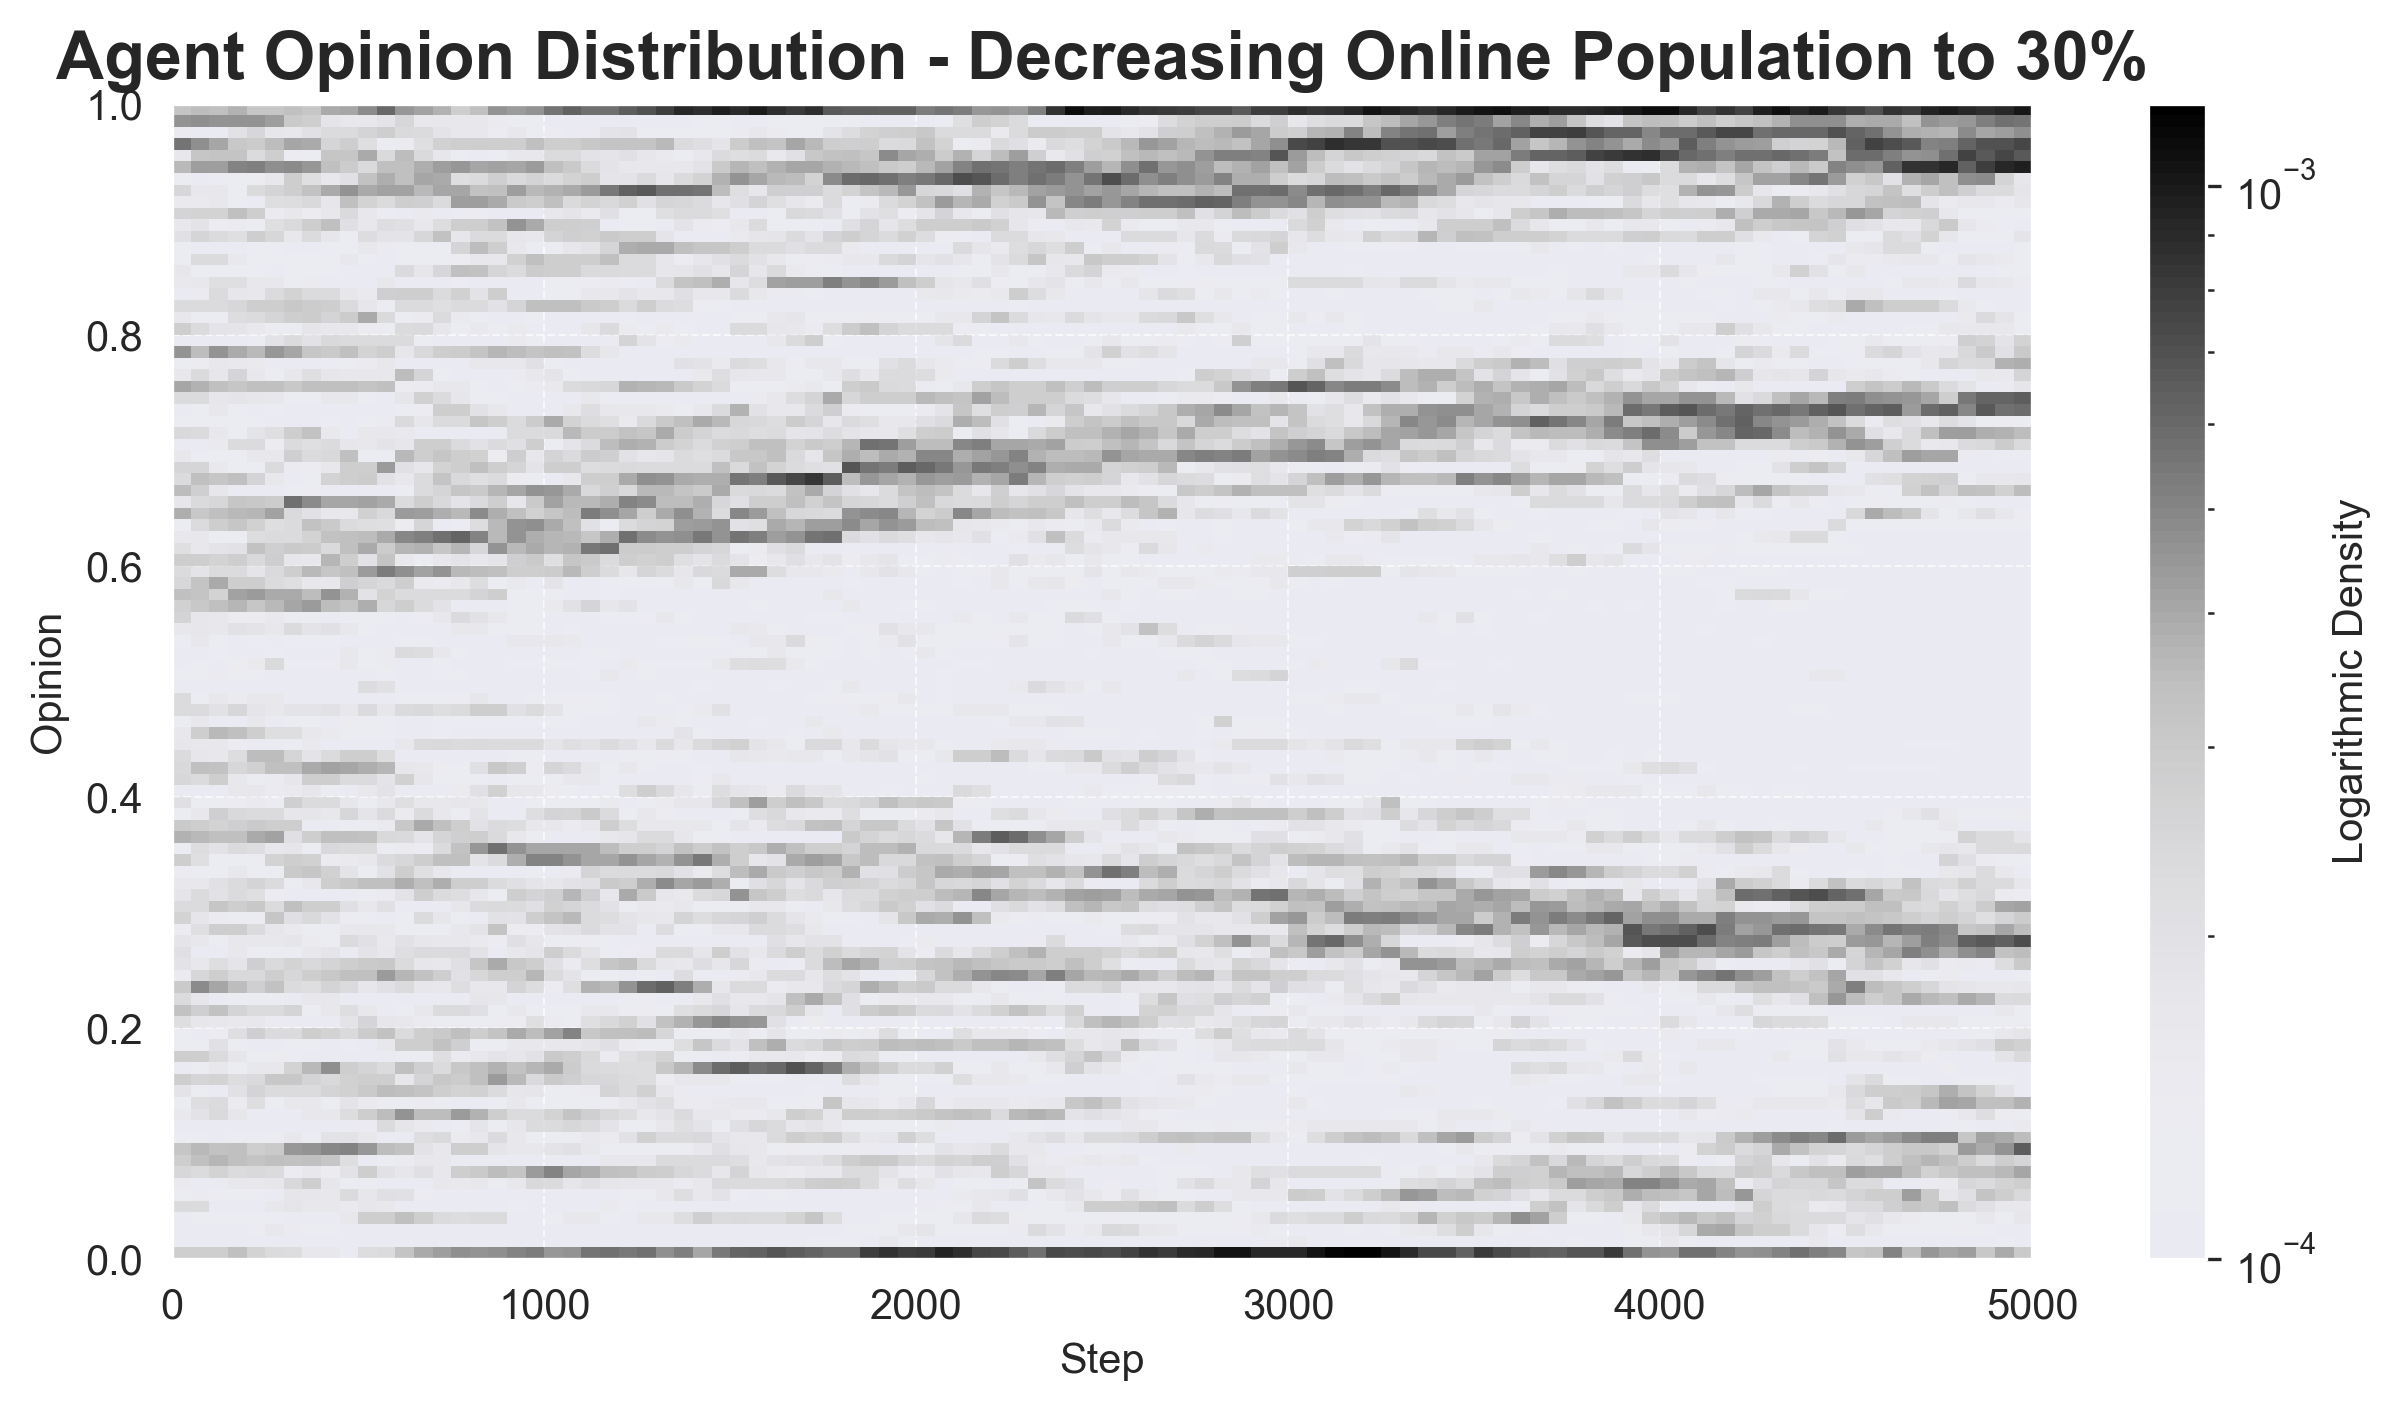

In [6]:
plt.figure(figsize=(10, 5), dpi=300)
 
histogram, xedges, yedges, image = plt.hist2d(steps, opinions, bins=[100, 100], cmap=cmap, norm=LogNorm(vmin=1e-4), density=True)
 
colorbar = plt.colorbar(image, label='Logarithmic Density')
colorbar.set_label('Logarithmic Density')
 
plt.xlabel('Step')
plt.ylabel('Opinion')
plt.title('Agent Opinion Distribution - Decreasing Online Population to 30%', fontsize=16, fontweight='bold')
 
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('plots/clusters/experiment-6.3.png', dpi=300)
plt.show()